<a href="https://colab.research.google.com/github/tarunc27/Google-Play-Store-Apps-EDA/blob/main/Googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Play Store**

Title: Exploratory Data Analysis of Google Play Store Apps

Objective: Analyze the Google Play Store dataset to identify trends, patterns, and insights about app characteristics (e.g., ratings, reviews, installs, categories).

Tools: Python, Pandas, Matplotlib, Seaborn, NumPy, SQL (optional), Excel (optional).

Dataset: Google Play Store Apps dataset (assumed to be a CSV file, e.g., googleplaystore.csv).

Step 1: Environment Set up

In [ ]:
pip install pandas numpy matplotlib seaborn scipy

Step 2: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

Step 3: Load and Explore the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Google play store app/googleplaystore.csv')  # Adjust path if needed

# Display basic information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nShape of the dataset:", df.shape)

First 5 rows of the dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.

Step 4: Data Cleaning

In [ ]:
# Check the data type and sample values of Installs
print("Installs column data type:", df['Installs'].dtype)
print("Sample Installs values:")
print(df['Installs'].head(10))
print("Unique Installs values:")
print(df['Installs'].unique())

Installs column data type: int64
Sample Installs values:
0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
6       50000
7     1000000
8     1000000
9       10000
Name: Installs, dtype: int64
Unique Installs values:
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [ ]:
# Step 4: Data Cleaning

# Remove duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

# Handle specific row issue (e.g., row 10472 mentioned in the document)
df.drop(10472, axis=0, inplace=True, errors='ignore')  # Drop if it exists

# Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Inspect Installs column (for verification)
print("\nInstalls column data type:", df['Installs'].dtype)
print("Sample Installs values:")
print(df['Installs'].head(10))

# Create Installs_category for handling missing ratings
# Since Installs is already numeric (int64), use it directly with pd.cut
df['Installs_category'] = pd.cut(df['Installs'],
                              bins=[0, 10, 100, 1000, 10000, 100000, 1000000, 10000000, float('inf')],
                              labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch'])

# Handle missing ratings based on Installs_category
def fill_missing_ratings(df, category, fill_value):
    filtered_df = df[(df['Installs_category'] == category) & df['Rating'].isnull()]
    df.loc[filtered_df.index, 'Rating'] = fill_value
    return df

# Fill values as specified in the document
fill_values = {
    'Low': 4.170970,
    'Very low': 4.637037,
    'Moderate': 4.035417,
    'More than moderate': 4.093255,
    'High': 4.207525,
    'no': 0
}
for category, value in fill_values.items():
    df = fill_missing_ratings(df, category, value)

# Drop rows with missing values in low-percentage columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

# Convert data types
# Convert Reviews to int
df['Reviews'] = df['Reviews'].astype(int)

# Installs is already int64, no conversion needed

# Convert Price to float (handling previous ValueError)
def clean_price(price):
    if isinstance(price, str):
        # Remove '$' and strip whitespace
        cleaned = price.replace('$', '').strip()
        try:
            return float(cleaned)
        except ValueError:
            return np.nan  # Return NaN for invalid entries
    return price

df['Price'] = df['Price'].apply(clean_price)
# Replace NaN in Price with 0.0 (assuming invalid prices are free apps)
df['Price'].fillna(0.0, inplace=True)

# Convert Size to MB
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
        else:
            return np.nan  # Handle 'Varies with device' or other invalid entries
    return size

df['Size_MB'] = df['Size'].apply(convert_size)

# Check results
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nShape After Cleaning:", df.shape)
print("\nPrice Column Data Type:", df['Price'].dtype)
print("Sample of Price Values:")
print(df['Price'].head())
print("\nInstalls Column Data Type:", df['Installs'].dtype)
print("Sample of Installs Values:")
print(df['Installs'].head())

Number of duplicates: 0
Shape after removing duplicates: (10346, 14)

Missing Values Before Cleaning:
App                   0
Category              0
Rating               14
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Installs_category    14
dtype: int64

Installs column data type: int64
Sample Installs values:
0       10000
1      500000
2     5000000
3    50000000
4      100000
5       50000
6       50000
7     1000000
8     1000000
9       10000
Name: Installs, dtype: int64

Missing Values After Cleaning:
App                     0
Category                0
Rating                 14
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Curr

Step 5: Data Visualization

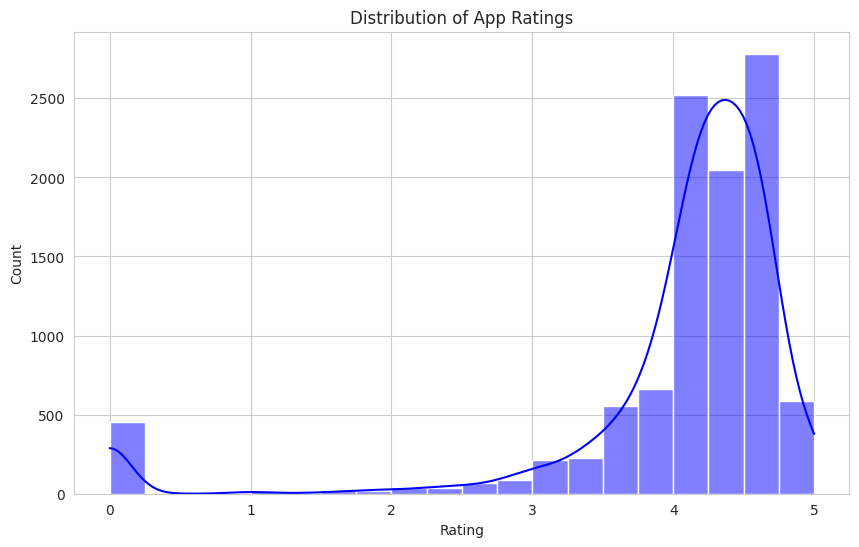

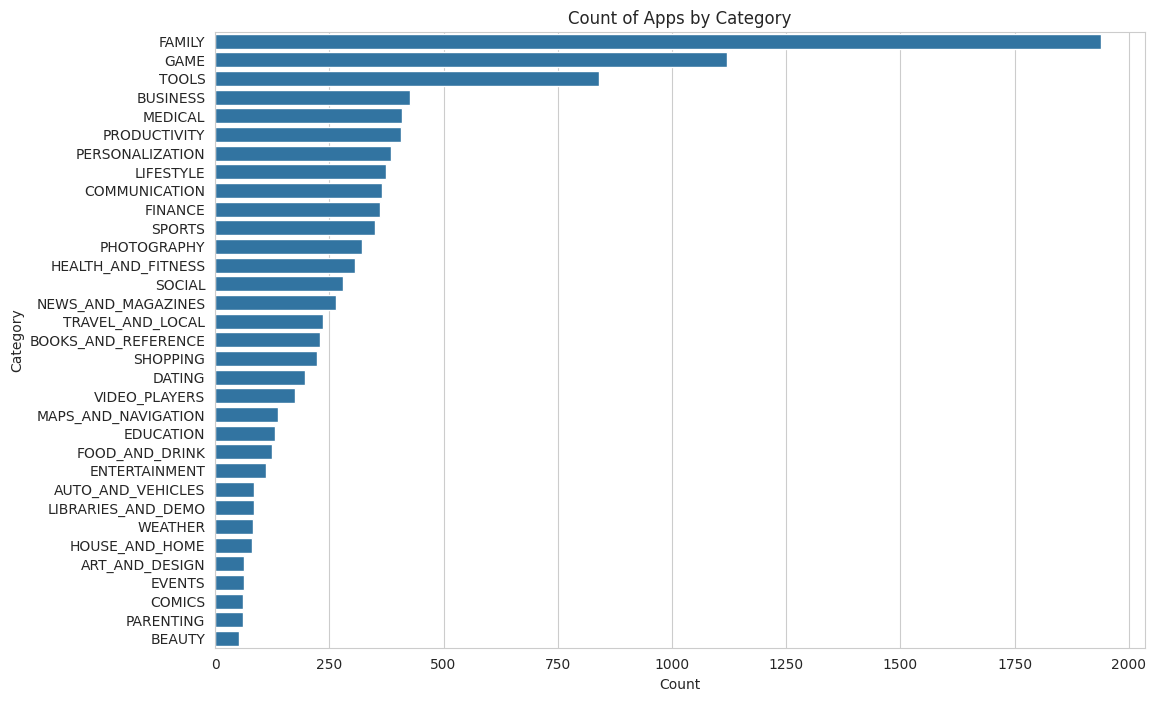

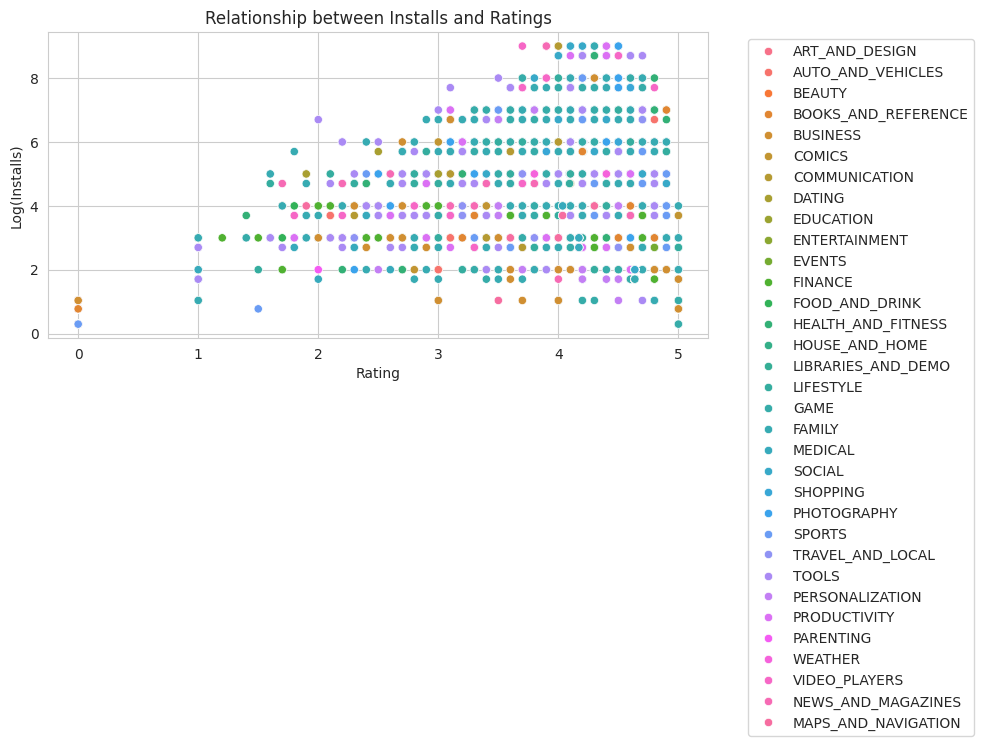

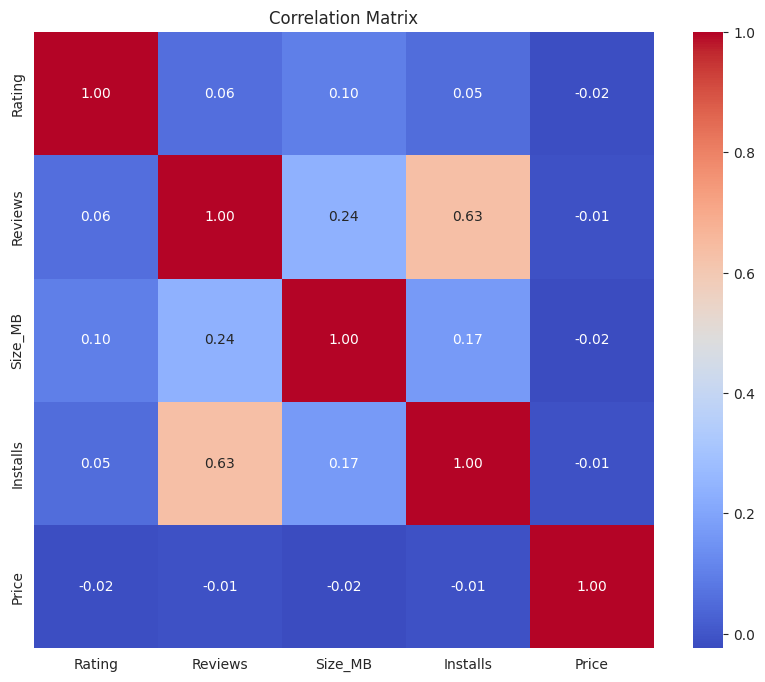

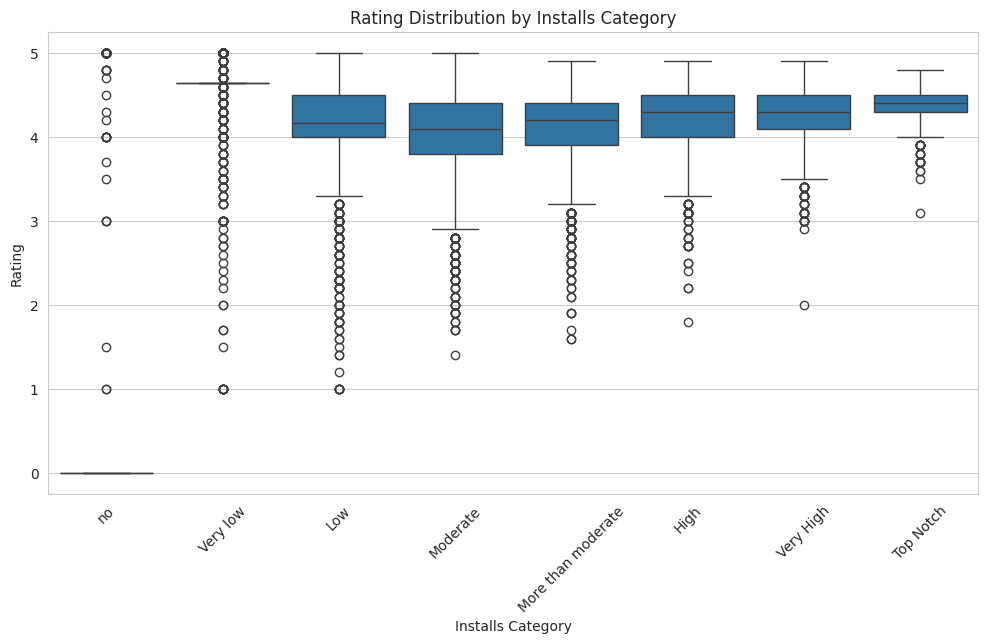

In [ ]:
# Set plot style
sns.set_style('whitegrid')

# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 2. Count of Apps by Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# 3. Relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y=np.log10(df['Installs'] + 1), hue='Category', data=df)
plt.title('Relationship between Installs and Ratings')
plt.xlabel('Rating')
plt.ylabel('Log(Installs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
numeric_cols = ['Rating', 'Reviews', 'Size_MB', 'Installs', 'Price']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5. Boxplot of Ratings by Installs Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_category', y='Rating', data=df)
plt.title('Rating Distribution by Installs Category')
plt.xlabel('Installs Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Top Categories by Rating: Events, Education, Books_and_Reference (around 4.3–4.4).
Most Installed Apps: Apps like YouTube, Google apps, or games with 1B+ installs.
Top Genres: Tools, Entertainment, Education, etc.
Highest Installs: GAME and COMMUNICATION categories dominate.
Highest Reviews: GAME and SOCIAL categories have the most reviews.

Step 7: Conclusion

The dataset contains 10,841 apps (10,346 after cleaning) across 33 categories.
FAMILY and GAME categories have the most apps, while GAME and COMMUNICATION lead in installs and reviews.
Most apps have ratings between 4.0 and 4.5, with EVENTS and EDUCATION categories having the highest average ratings.
Reviews and Installs are strongly correlated (Pearson’s R = 0.6262), indicating that popular apps receive more reviews.
Missing ratings were more common in apps with low installs, supporting the hypothesis that less popular apps have fewer ratings.
Duplicates (483) were removed to ensure accurate insights.